# Census Income Prediction:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [2]:
cn=pd.read_csv('Census_Income.csv')
cn

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
cn.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
cn.shape

(32560, 15)

In [5]:
cn.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
cn['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
cn.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning:-

In [9]:
cn.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Above observations shows that there are no null values present in this dataset.

In [11]:
cn.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Observations shows that some columns are integer and float type and rest are object type.

In [12]:
cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# EDA:-

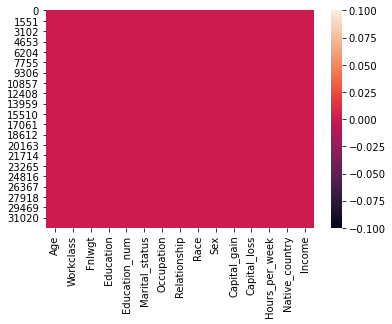

In [14]:
sns.heatmap(cn.isnull())
plt.show()

This above heatmap displays that null values are present in this dataset.

1. Univariate analysis:-

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


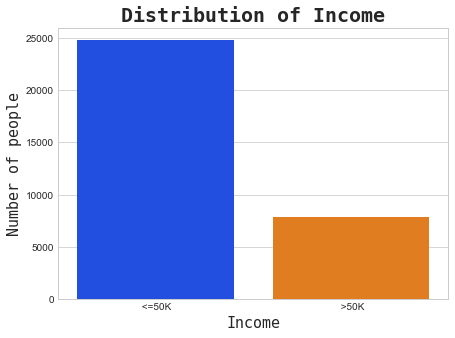

In [16]:
# Creating a barplot for 'Income'
income = cn['Income'].value_counts()
print(income)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

There are three times more records in income-[<=50k] class than in income-[>50k] class, means the dataset is imbalanced.

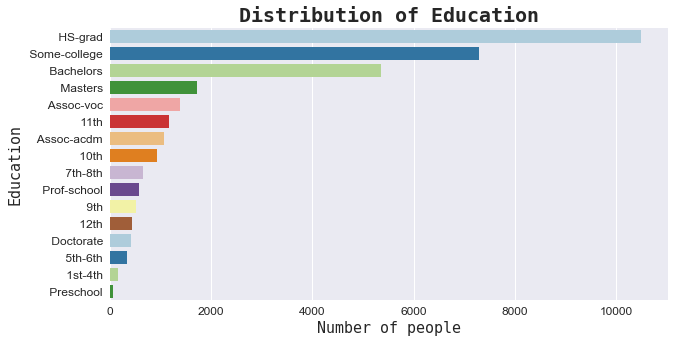

In [17]:
# Creating a barplot for 'Education'
edu = cn['Education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

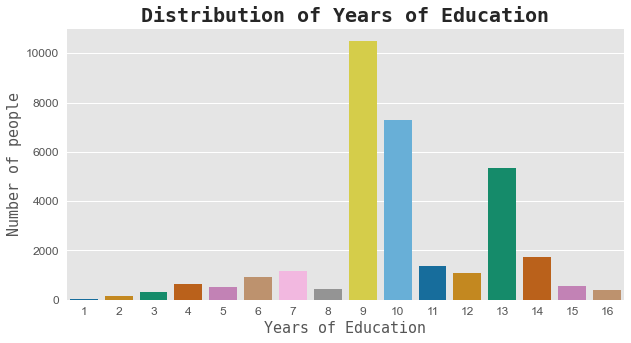

In [19]:
# Creating a barplot for 'Years of Education'
edu_num = cn['Education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

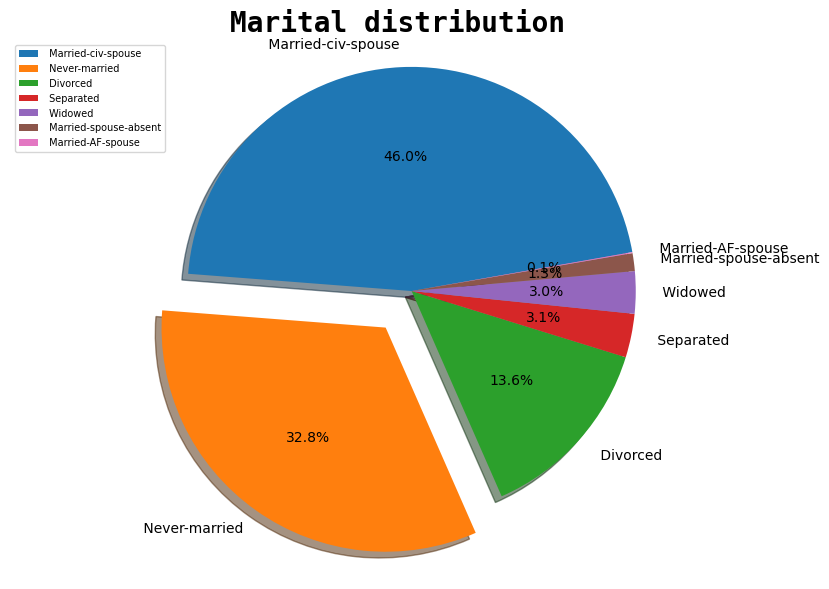

In [20]:
# Creating a pie chart for 'Marital status'
marital = cn['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

Above piechart shows the percentages of different marital categories.

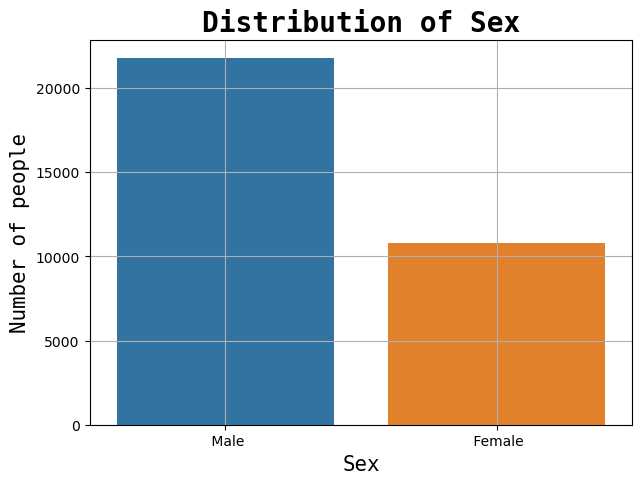

In [22]:
# Creating a barplot for 'Sex'
sex = cn['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

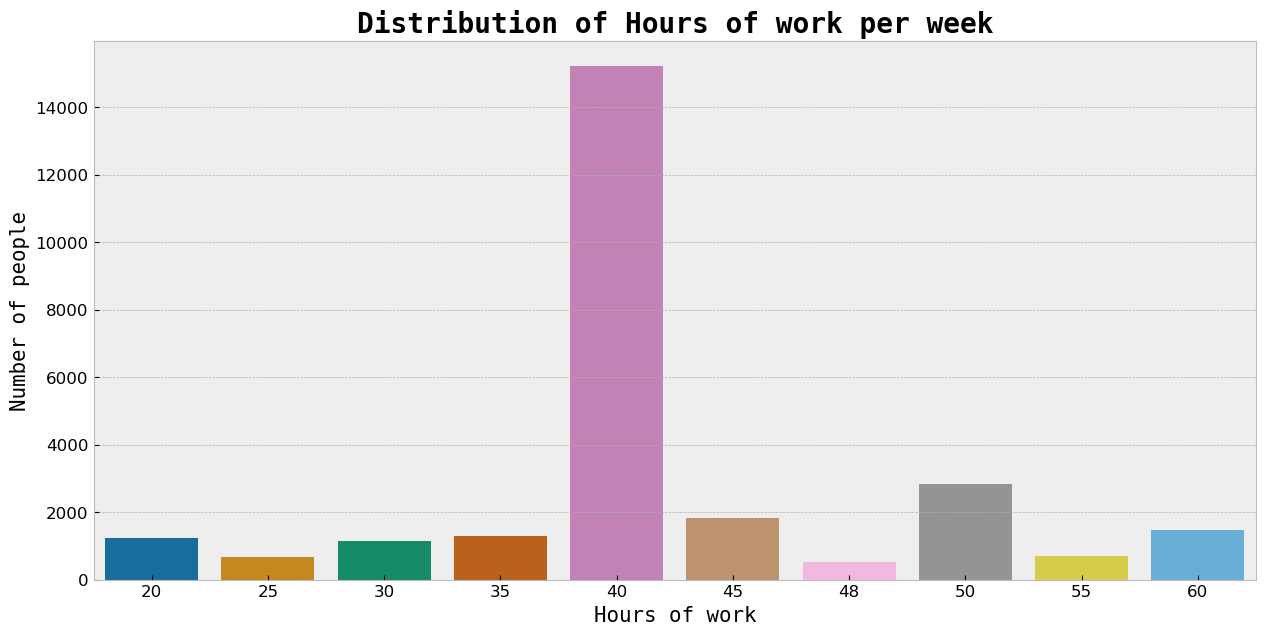

In [23]:
# Creating a barplot for 'Hours per week'
hours = cn['Hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

2. Bivariate analysis:-

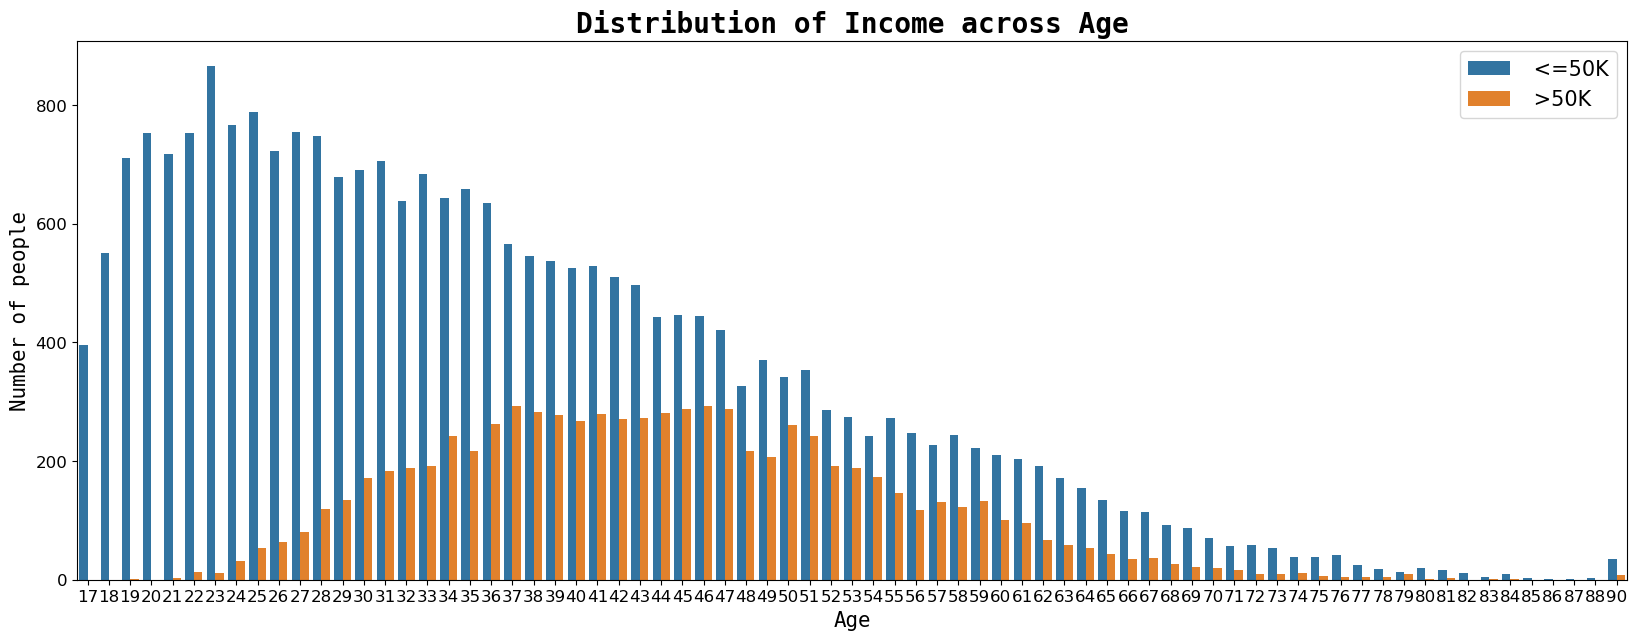

In [25]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(cn['Age'], hue=cn['Income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

Above chart shows that people in lower age group[17-20] and very high old age group[80-90] are having their income range less
than 50k whereas maximum people that belongs to middle age group are having their income in range more than 50k.

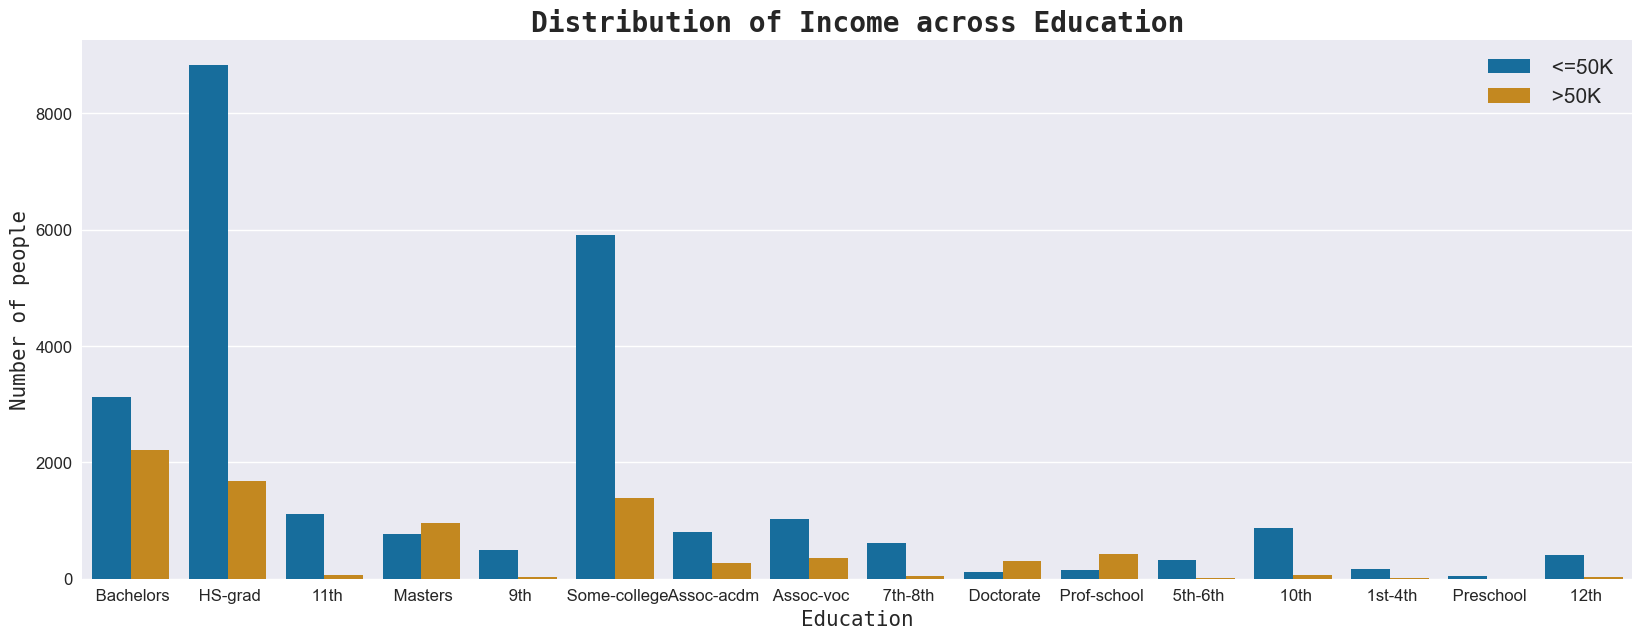

In [26]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(cn['Education'],
              hue=cn['Income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

Above countplot shows that people with higher educational qualification/degree specially 'HS-grad','Some college' are having 
good income range. 

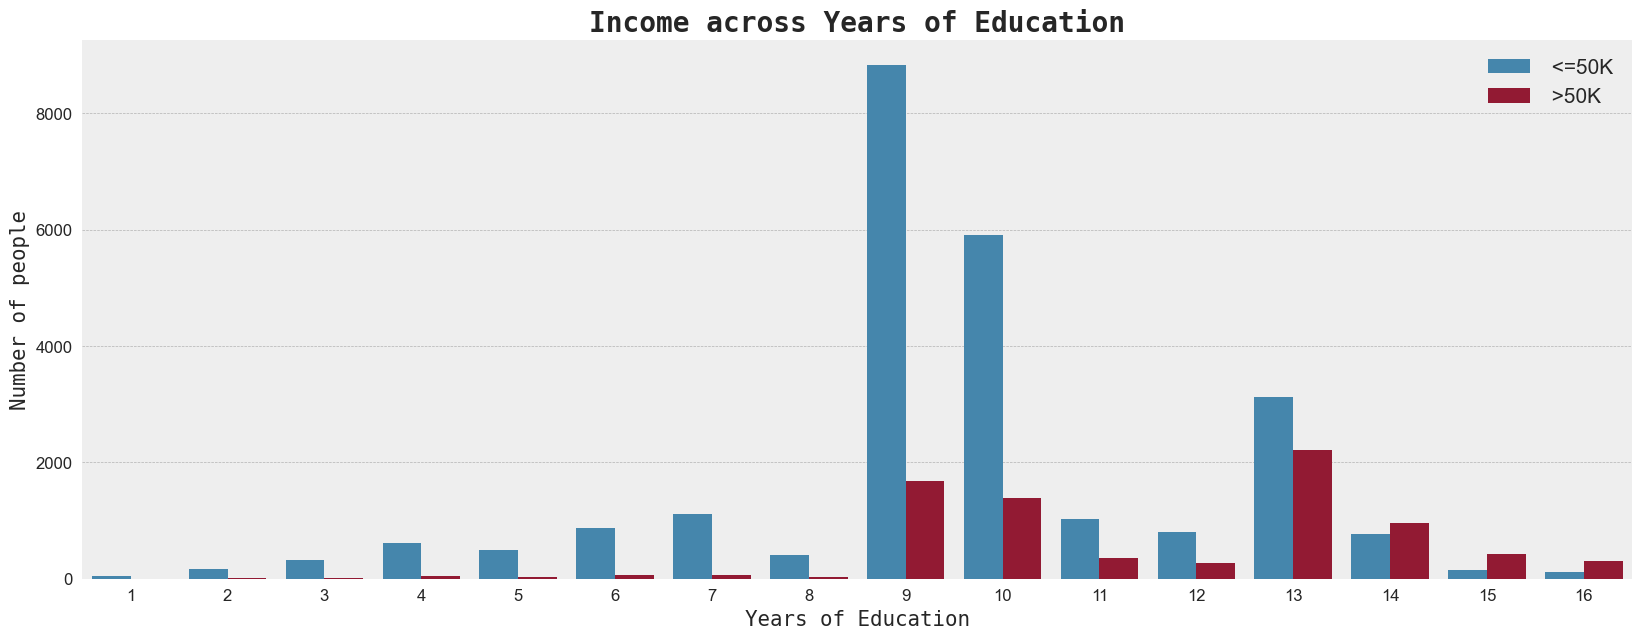

In [27]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(cn['Education_num'],
              hue=cn['Income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

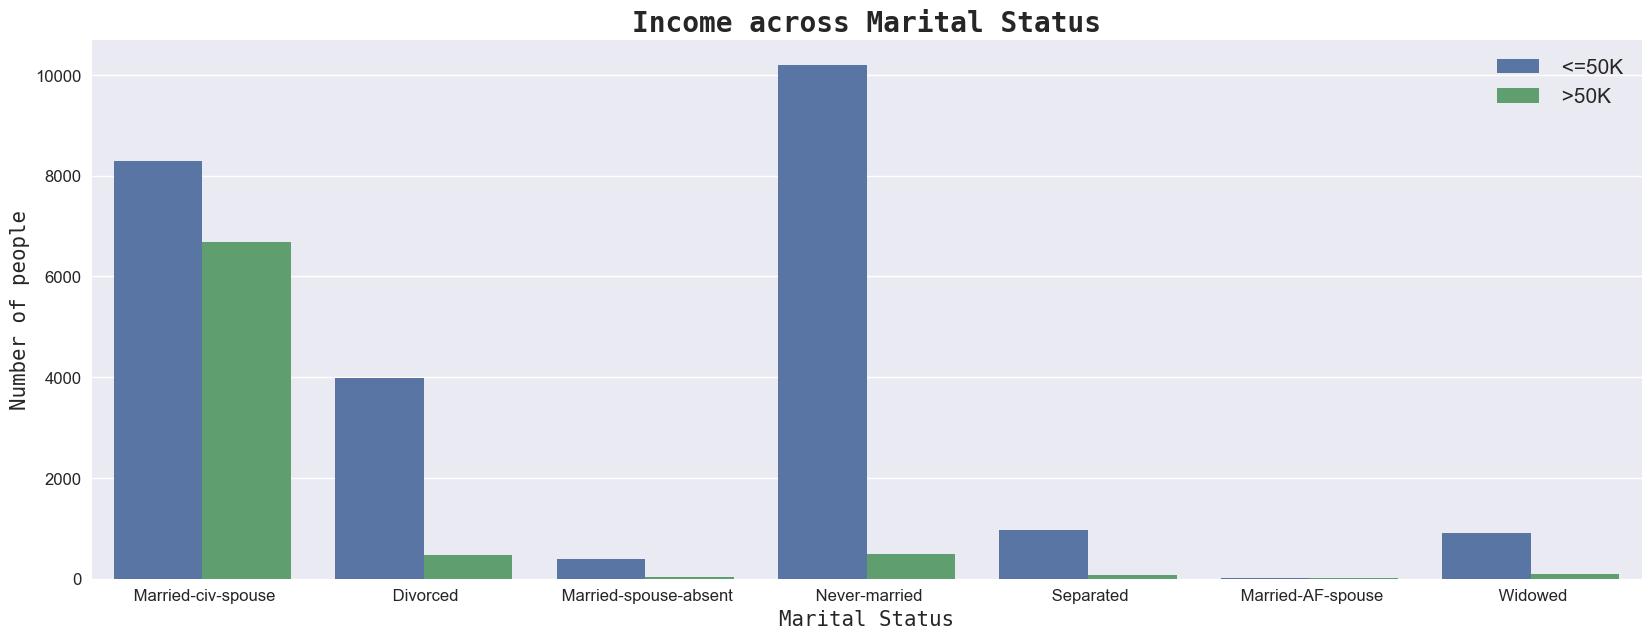

In [28]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(cn['Marital_status'], hue=cn['Income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

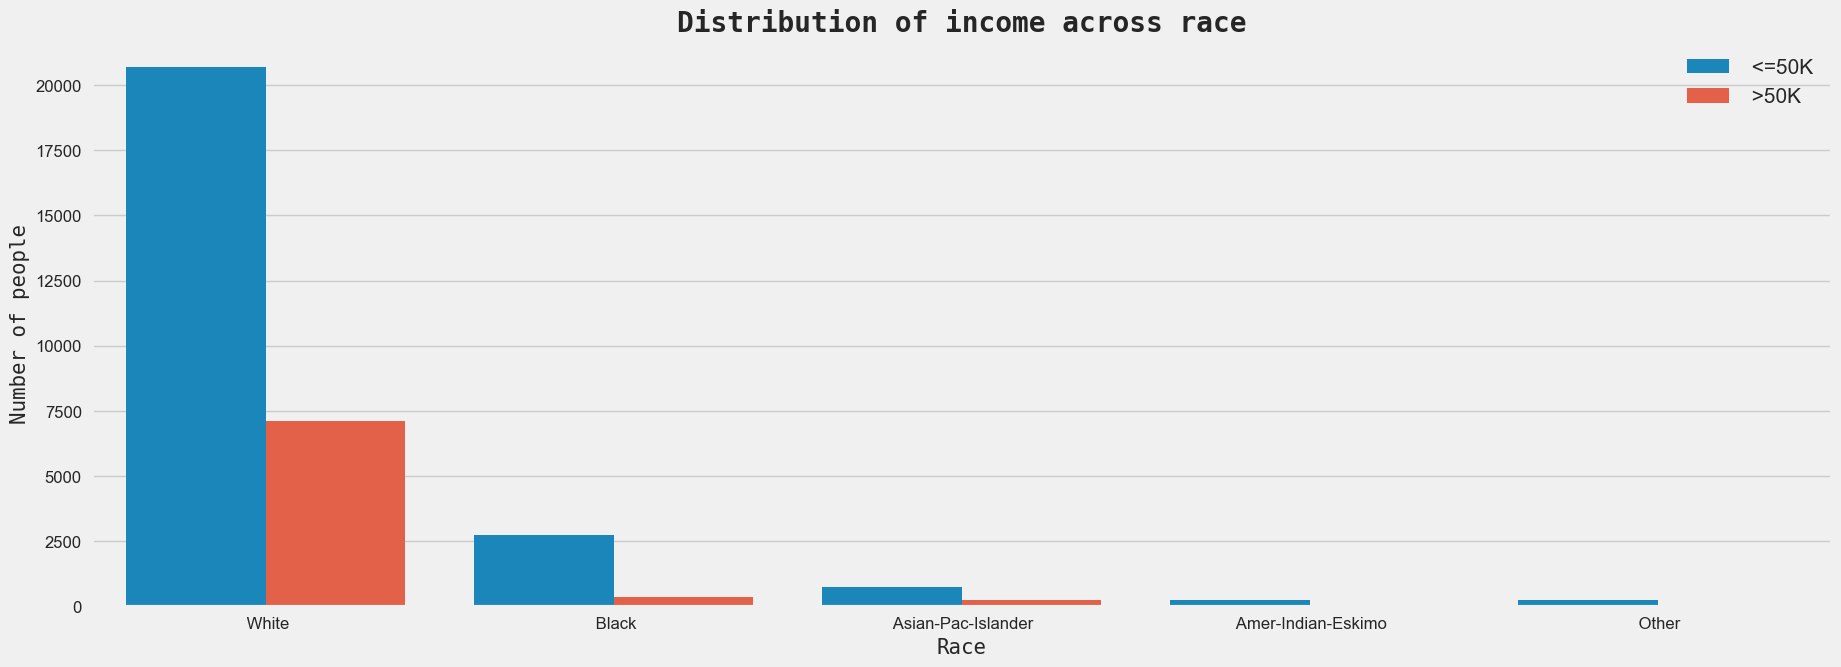

In [29]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(cn['Race'], hue=cn['Income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

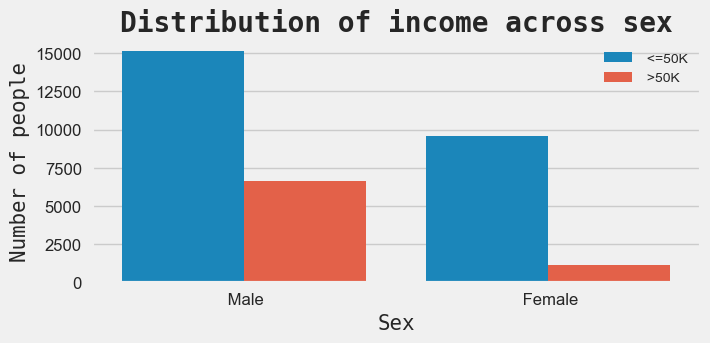

In [30]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(cn['Sex'], hue=cn['Income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

3. Multivariate analysis:-

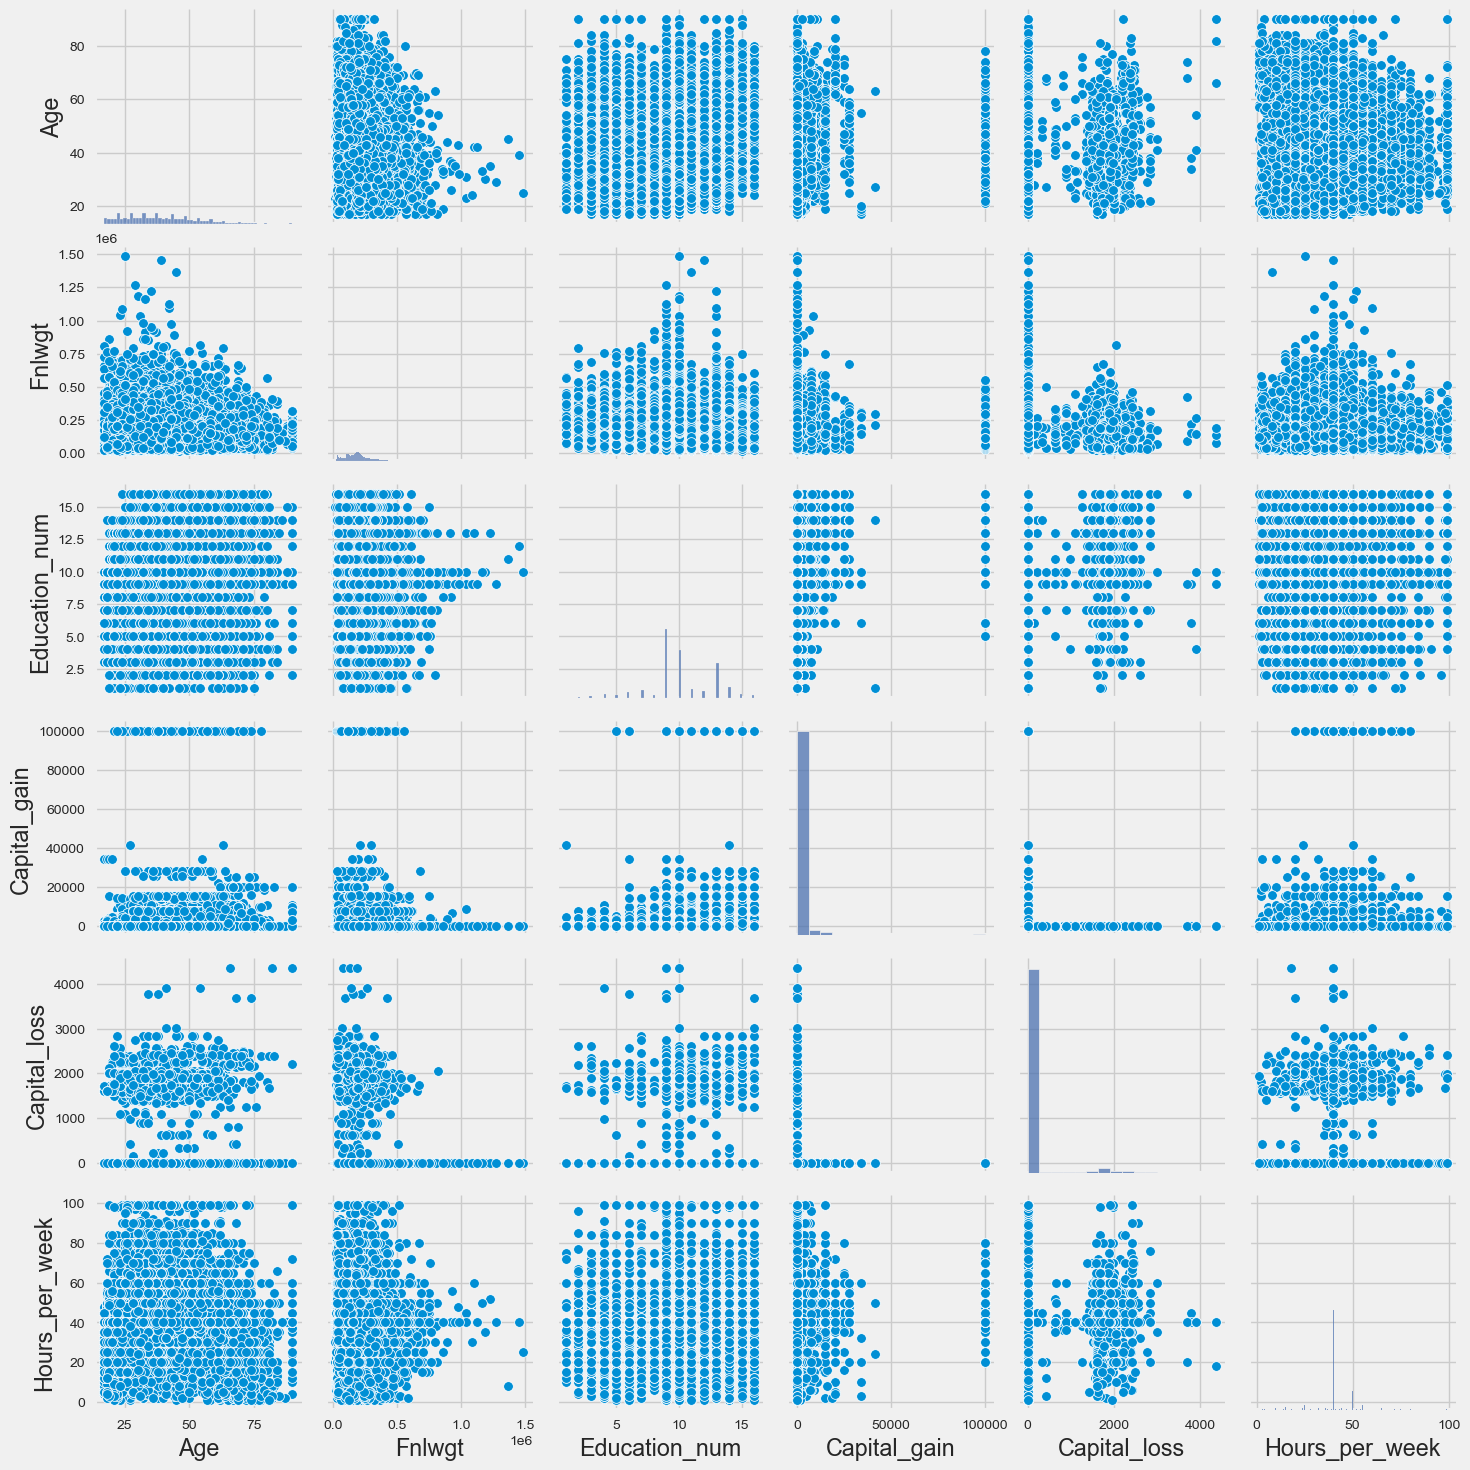

In [31]:
# Creating a pairplot of dataset

sns.pairplot(cn)
plt.show()

In [33]:
cn.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [3]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [4]:
le=LabelEncoder()

val=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for i in val:
    cn[i]=le.fit_transform(cn[i])

In [5]:
cn

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [36]:
cn.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Now, All the data types are converted into integer type.

# Correlation:-

In [6]:
# Checking the Correlation with respect to target variable(Income):-

cn.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

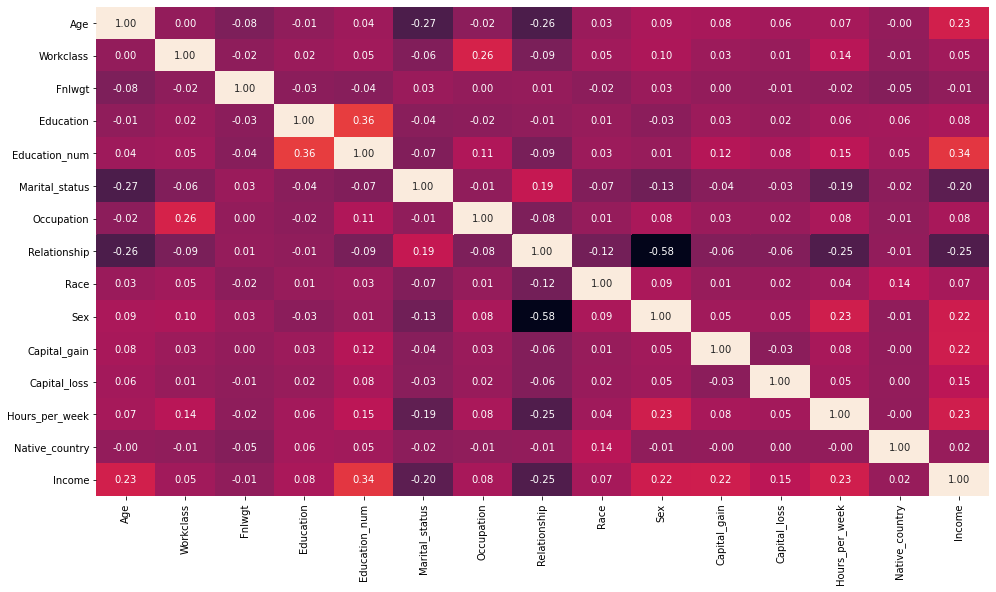

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(cn.corr(),annot=True,fmt='0.2f',cbar=False)
plt.show()

Above heatmap shows that 'Capital_gain','Hours_per_week','Age' and 'Education_num' are highly correlated with the target 
variable whereas, 'Fnlwgt','Native_country','Workclass','Race','Education' and 'Capital_loss' are less correlated with the
target variable.

In [39]:
cn.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Feature Selection:-

In [8]:
# Drop the less correlated/non-relevant columns;

cn=cn.drop(['Fnlwgt','Native_country','Workclass','Race','Education','Capital_loss'],axis=1)
cn

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Hours_per_week,Income
0,50,13,2,4,0,1,0,13,0
1,38,9,0,6,1,1,0,40,0
2,53,7,2,6,0,1,0,40,0
3,28,13,2,10,5,0,0,40,0
4,37,14,2,4,5,0,0,40,0
...,...,...,...,...,...,...,...,...,...
32555,27,12,2,13,5,0,0,38,0
32556,40,9,2,7,0,1,0,40,1
32557,58,9,6,1,4,0,0,40,0
32558,22,9,4,1,3,1,0,20,0


In [9]:
cn.shape

(32560, 9)

# Checking for the Skewness:-

In [10]:
cn.skew()

Age                0.558738
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Sex               -0.719244
Capital_gain      11.953690
Hours_per_week     0.227636
Income             1.212383
dtype: float64

Above data shows that 'Age','Relationship' and 'Capital_gain' are highly skewed.

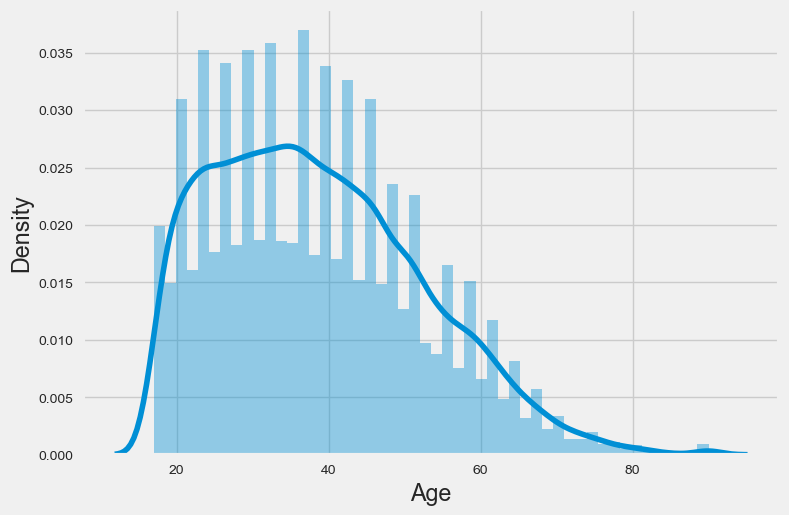

In [43]:
# checking with the distribution curve:-

sns.distplot(cn['Age'])
plt.show()

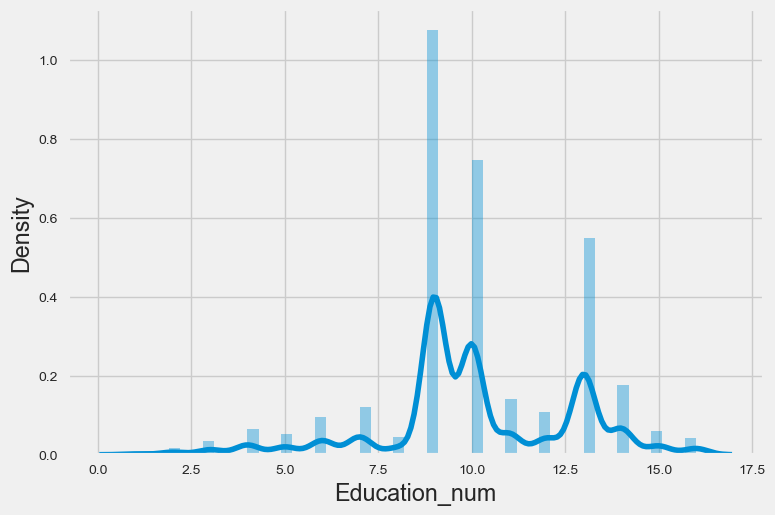

In [44]:
sns.distplot(cn['Education_num'])
plt.show()

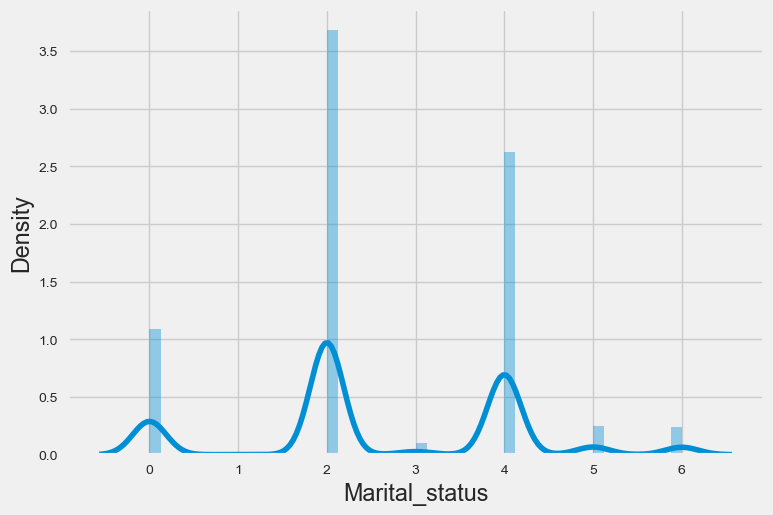

In [45]:
sns.distplot(cn['Marital_status'])
plt.show()

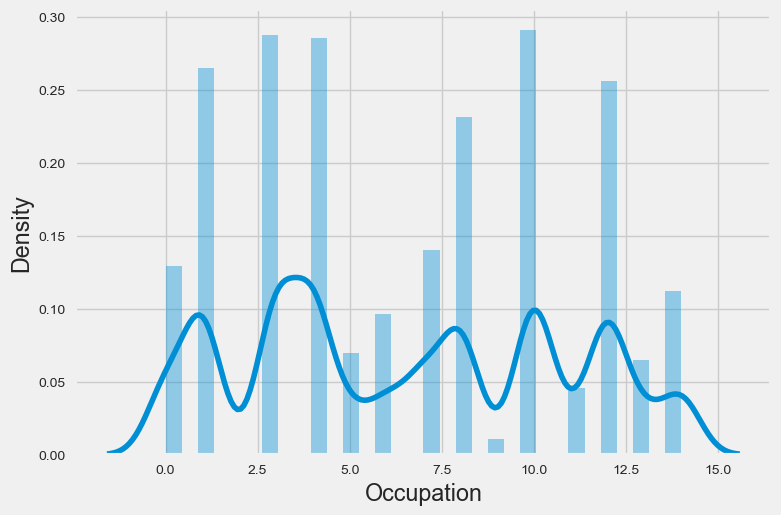

In [46]:
sns.distplot(cn['Occupation'])
plt.show()

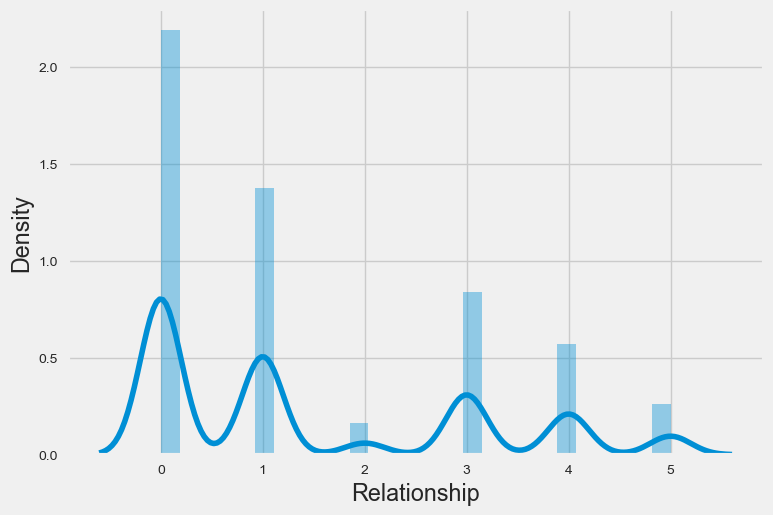

In [47]:
sns.distplot(cn['Relationship'])
plt.show()

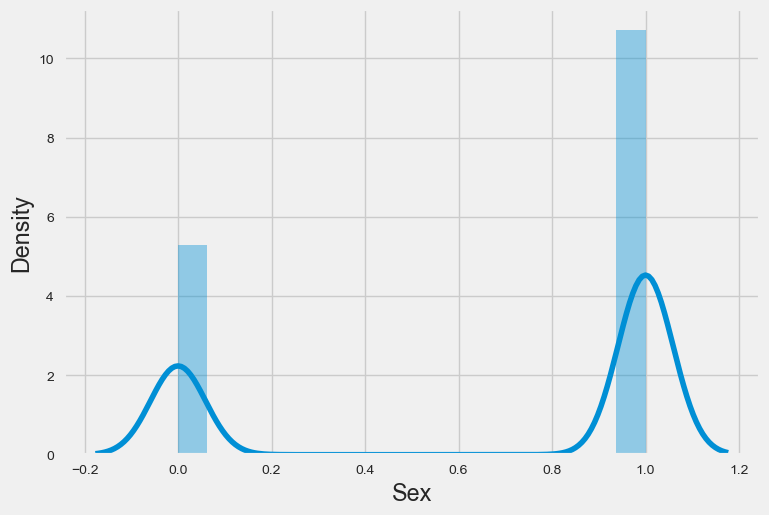

In [48]:
sns.distplot(cn['Sex'])
plt.show()

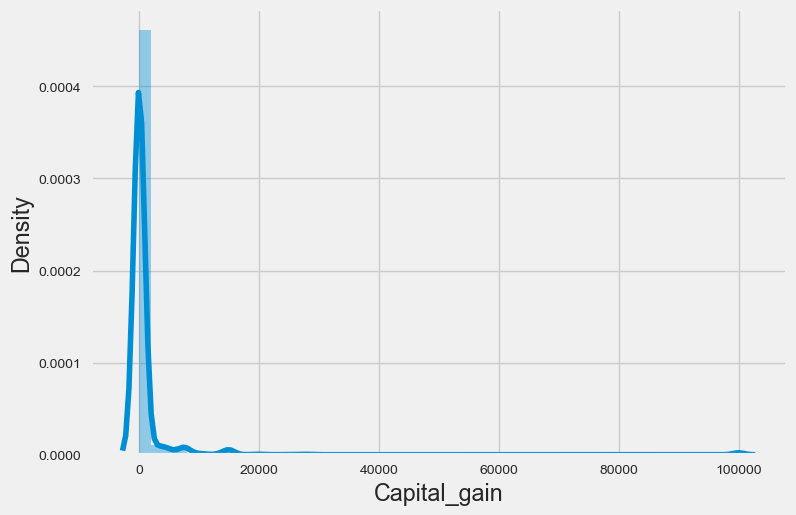

In [49]:
sns.distplot(cn['Capital_gain'])
plt.show()

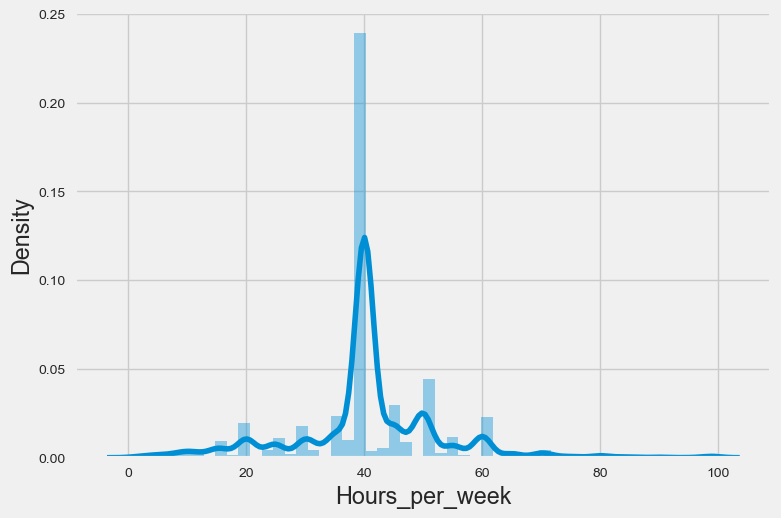

In [50]:
sns.distplot(cn['Hours_per_week'])
plt.show()

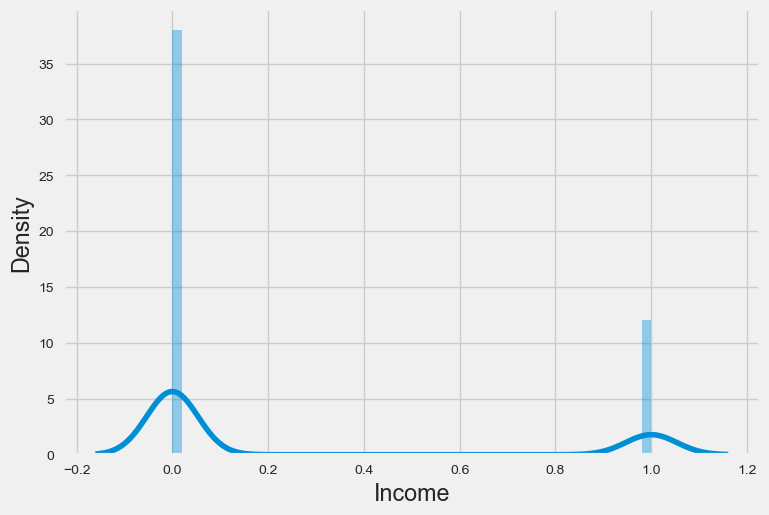

In [51]:
sns.distplot(cn['Income'])
plt.show()

Above visualizations shows that the is not normalized.The building blocks is out of normalized curve.

# Outliers Removal:-

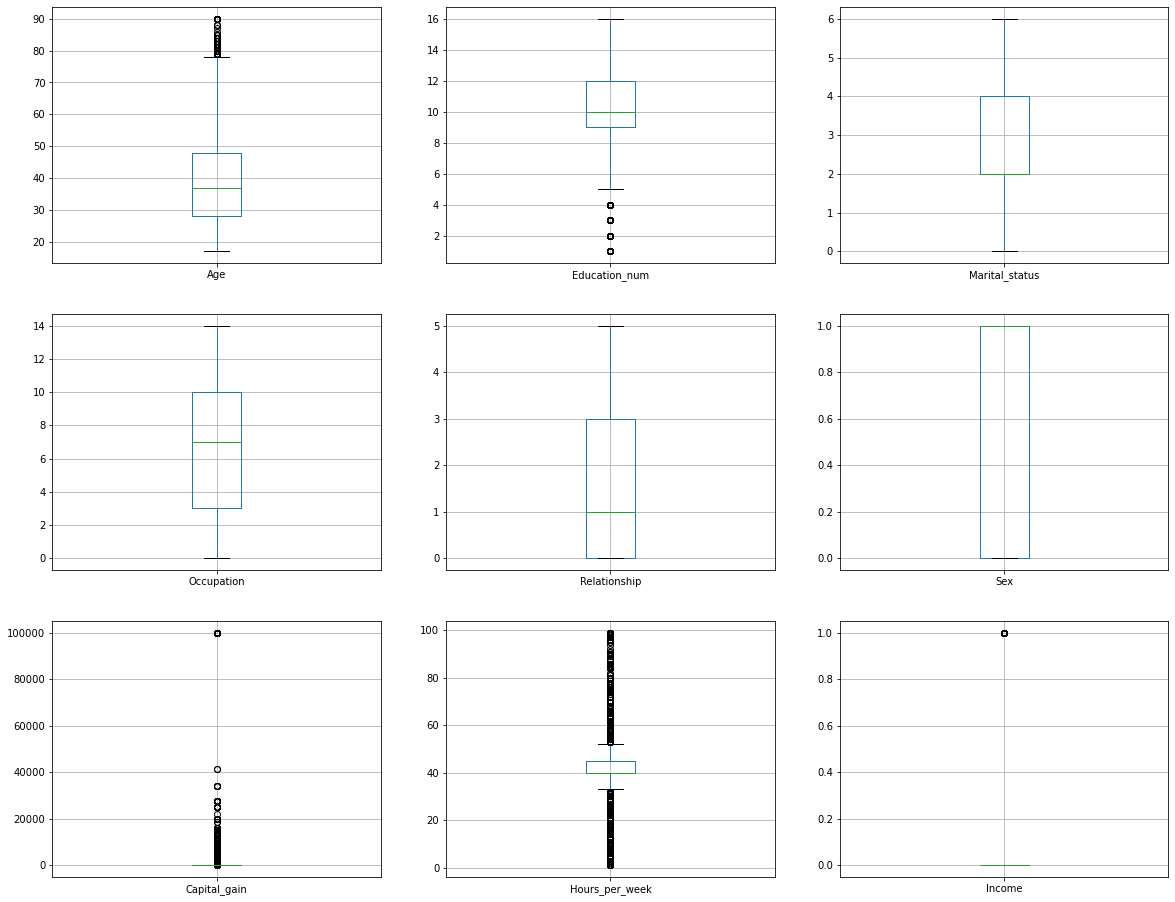

In [11]:
cn.plot(kind='box',subplots=True,layout=(3,3),figsize=(20,16),grid=True)
plt.show()

In [12]:
from scipy.stats import zscore
z=np.abs(zscore(cn))
z

array([[0.83709708, 1.13477863, 0.40618296, ..., 0.14591373, 2.22212013,
        0.5632099 ],
       [0.04264043, 0.42002663, 1.73402603, ..., 0.14591373, 0.03542999,
        0.5632099 ],
       [1.05703146, 1.19742926, 0.40618296, ..., 0.14591373, 0.03542999,
        0.5632099 ],
       ...,
       [1.42358875, 0.42002663, 2.2495032 , ..., 0.14591373, 0.03542999,
        0.5632099 ],
       [1.21562378, 0.42002663, 0.92166012, ..., 0.14591373, 1.65520046,
        0.5632099 ],
       [0.98372   , 0.42002663, 0.40618296, ..., 1.88840054, 0.03542999,
        1.77553698]])

In [13]:
# index no.

np.where(z>3)

(array([    9,    27,    76,   105,   156,   159,   188,   220,   221,
          223,   271,   298,   415,   429,   462,   485,   519,   535,
          588,   703,   917,   928,   931,   934,  1033,  1035,  1039,
         1063,  1065,  1138,  1167,  1171,  1199,  1245,  1261,  1271,
         1290,  1367,  1410,  1416,  1457,  1481,  1499,  1527,  1561,
         1615,  1633,  1681,  1683,  1729,  1763,  1764,  1770,  1823,
         1825,  1886,  1912,  1928,  1934,  1986,  2014,  2102,  2302,
         2318,  2332,  2357,  2360,  2428,  2443,  2580,  2583,  2593,
         2670,  2706,  2753,  2760,  2816,  2860,  2883,  2890,  2905,
         2919,  2931,  2945,  2958,  2962,  3091,  3104,  3174,  3210,
         3224,  3231,  3290,  3301,  3342,  3367,  3445,  3536,  3577,
         3591,  3748,  3772,  3776,  3835,  3908,  3940,  3962,  4069,
         4085,  4090,  4100,  4106,  4108,  4235,  4293,  4302,  4307,
         4311,  4321,  4325,  4336,  4347,  4388,  4420,  4440,  4523,
      

In [14]:
cn_new=cn[(z<3).all(axis=1)]
cn_new

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Hours_per_week,Income
0,50,13,2,4,0,1,0,13,0
1,38,9,0,6,1,1,0,40,0
2,53,7,2,6,0,1,0,40,0
3,28,13,2,10,5,0,0,40,0
4,37,14,2,4,5,0,0,40,0
...,...,...,...,...,...,...,...,...,...
32555,27,12,2,13,5,0,0,38,0
32556,40,9,2,7,0,1,0,40,1
32557,58,9,6,1,4,0,0,40,0
32558,22,9,4,1,3,1,0,20,0


In [56]:
cn.shape

(32560, 9)

In [57]:
cn_new.shape

(31586, 9)

In [58]:
# percentage data loss:-

loss_percent=(32560-31586)/(32560*100)
print(loss_percent,'%')

0.00029914004914004917 %


In [15]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(cn,method='yeo-johnson')
X

array([[ 0.89194656,  1.16479277, -0.38342726, ..., -0.30136989,
        -2.22151541, -0.5632099 ],
       [ 0.10271741, -0.4643296 , -1.78243401, ..., -0.30136989,
        -0.03557001, -0.5632099 ],
       [ 1.06438077, -1.20027437, -0.38342726, ..., -0.30136989,
        -0.03557001, -0.5632099 ],
       ...,
       [ 1.33455599, -0.4643296 ,  2.1717841 , ..., -0.30136989,
        -0.03557001, -0.5632099 ],
       [-1.35834147, -0.4643296 ,  0.91971919, ..., -0.30136989,
        -1.65499204, -0.5632099 ],
       [ 1.00782289, -0.4643296 , -0.38342726, ...,  3.31823374,
        -0.03557001,  1.77553698]])

In [60]:
X.ndim

2

In [61]:
X.std()

1.0000000000000002

In [16]:
x=cn_new.drop(['Income'],axis=1)
x

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Hours_per_week
0,50,13,2,4,0,1,0,13
1,38,9,0,6,1,1,0,40
2,53,7,2,6,0,1,0,40
3,28,13,2,10,5,0,0,40
4,37,14,2,4,5,0,0,40
...,...,...,...,...,...,...,...,...
32555,27,12,2,13,5,0,0,38
32556,40,9,2,7,0,1,0,40
32557,58,9,6,1,4,0,0,40
32558,22,9,4,1,3,1,0,20


In [17]:
y=cn_new['Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 31586, dtype: int32

# Oversampling to resolve imbalancing of the dataset:-

In [64]:
x.shape

(31586, 8)

In [65]:
y.shape

(31586,)

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
y.value_counts()

0    24103
1     7483
Name: Income, dtype: int64

In [20]:
sm=SMOTE()
x_traint,y_traint=sm.fit_resample(x,y)

In [21]:
y_traint.value_counts()

0    24103
1    24103
Name: Income, dtype: int64

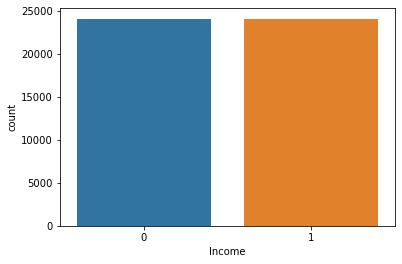

In [22]:
sns.countplot(y_traint)
plt.show()

# Machine Learning Algorithms Training and Testing Process:-

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_traint,y_traint,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc= accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    print('\n')
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

accuracy 0.740925119269861 random_state 1


max_accuracy 0.740925119269861 max_random_state 1
accuracy 0.7392657125077785 random_state 2


accuracy 0.7475627463181912 random_state 3


max_accuracy 0.7475627463181912 max_random_state 3
accuracy 0.7385397220493674 random_state 4


accuracy 0.7479775980087119 random_state 5


max_accuracy 0.7479775980087119 max_random_state 5
accuracy 0.7336652146857499 random_state 6


accuracy 0.7418585355735324 random_state 7


accuracy 0.7394731383530387 random_state 8


accuracy 0.7329392242273387 random_state 9


accuracy 0.7306575399294752 random_state 10


accuracy 0.7426882389545737 random_state 11


accuracy 0.7479775980087119 random_state 12


accuracy 0.7242273387264053 random_state 13


accuracy 0.7385397220493674 random_state 14


accuracy 0.7357394731383531 random_state 15


accuracy 0.7377100186683261 random_state 16


accuracy 0.7384360091267372 random_state 17


accuracy 0.7418585355735324 random_state 18


accuracy 0.7463181912466293 ra

In [25]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.7525409666044389 on Random_state 49


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=49)

In [27]:
# Logistic Regression;

lr=LogisticRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 78.61665083887306
[[4601  247]
 [1104  366]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4848
           1       0.60      0.25      0.35      1470

    accuracy                           0.79      6318
   macro avg       0.70      0.60      0.61      6318
weighted avg       0.76      0.79      0.75      6318



In [28]:
# Naive Bayes Classifier;

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_gnb)*100)
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))

Accuracy 82.4628046850269
[[4600  248]
 [ 860  610]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4848
           1       0.71      0.41      0.52      1470

    accuracy                           0.82      6318
   macro avg       0.78      0.68      0.71      6318
weighted avg       0.81      0.82      0.81      6318



In [29]:
# K-NearestNeighbors;

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_knn)*100)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

Accuracy 83.64988920544477
[[4494  354]
 [ 679  791]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4848
           1       0.69      0.54      0.60      1470

    accuracy                           0.84      6318
   macro avg       0.78      0.73      0.75      6318
weighted avg       0.83      0.84      0.83      6318



In [30]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 80.57929724596391
[[4296  552]
 [ 675  795]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4848
           1       0.59      0.54      0.56      1470

    accuracy                           0.81      6318
   macro avg       0.73      0.71      0.72      6318
weighted avg       0.80      0.81      0.80      6318



In [31]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 83.03260525482747
[[4397  451]
 [ 621  849]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4848
           1       0.65      0.58      0.61      1470

    accuracy                           0.83      6318
   macro avg       0.76      0.74      0.75      6318
weighted avg       0.82      0.83      0.83      6318



In [32]:
# Ada Boost Classifier;

from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_ad)*100)
print(confusion_matrix(y_test,pred_ad))
print(classification_report(y_test,pred_ad))

Accuracy 85.7866413421969
[[4525  323]
 [ 575  895]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4848
           1       0.73      0.61      0.67      1470

    accuracy                           0.86      6318
   macro avg       0.81      0.77      0.79      6318
weighted avg       0.85      0.86      0.85      6318



In [33]:
# Gradient Boost Classifier;

from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_gb)*100)
print(confusion_matrix(y_test,pred_gb))
print(classification_report(y_test,pred_gb))

Accuracy 86.1665083887306
[[4572  276]
 [ 598  872]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4848
           1       0.76      0.59      0.67      1470

    accuracy                           0.86      6318
   macro avg       0.82      0.77      0.79      6318
weighted avg       0.86      0.86      0.86      6318



Therefore, Gradient Boosting Classifier shows the best metrics results among other models.

In [34]:
# Cross Validation for logistic regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x_traint,y_traint,cv=9)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predlr)*100)

Cross validation score of Logistic Regression model: [0.73585962 0.72540601 0.73823749 0.7298357  0.73543689 0.74626587
 0.75784167 0.74178491 0.74738611]
Mean of Cross validation score: 0.739783809110577
Accuracy 78.61665083887306


In [35]:
# Cross Validation for gaussian naive bayes classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(gnb,x_traint,y_traint,cv=9)
print('Cross validation score of gaussian naive bayes model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_gnb)*100)

Cross validation score of gaussian naive bayes model: [0.76554041 0.7735673  0.77688574 0.76624347 0.77165795 0.78099328
 0.7815534  0.78192681 0.77203137]
Mean of Cross validation score: 0.7744888576112037
Accuracy 82.4628046850269


In [36]:
# Cross Validation for Knn Classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(knn,x_traint,y_traint,cv=9)
print('Cross validation score of Knn model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_knn)*100)

Cross validation score of Knn model: [0.81052828 0.82098189 0.82412248 0.84297984 0.8506348  0.84634055
 0.84895444 0.84988798 0.84223301]
Mean of Cross validation score: 0.8374070303258319
Accuracy 83.64988920544477


In [37]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(dt,x_traint,y_traint,cv=9)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,preddt)*100)

Cross validation score of Decision Tree Classifier model: [0.81164831 0.81967519 0.81665422 0.86426438 0.8706124  0.87397311
 0.8678118  0.86613144 0.86090366]
Mean of Cross validation score: 0.8501860566861265
Accuracy 80.57929724596391


In [38]:
# Cross Validation for Random Forest classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(rf,x_traint,y_traint,cv=9)
print('Cross validation score of Random Forest Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predrf)*100)

Cross validation score of Random Forest Classifier model: [0.83703565 0.84114243 0.84167289 0.88648245 0.89096341 0.89171023
 0.88554892 0.88834951 0.87733383]
Mean of Cross validation score: 0.8711377027200078
Accuracy 83.03260525482747


In [39]:
# Cross Validation for AdaBoost classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(ad,x_traint,y_traint,cv=9)
print('Cross validation score of AdaBoost Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Classifier model: [0.81743513 0.81836849 0.82935026 0.83681852 0.84036594 0.84522031
 0.84634055 0.84111277 0.83308439]
Mean of Cross validation score: 0.8342329308019785
Accuracy 85.7866413421969


In [40]:
# Cross Validation for GradientBoosting classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(gb,x_traint,y_traint,cv=9)
print('Cross validation score of GradientBoosting Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_gb)*100)

Cross validation score of GradientBoosting Classifier model: [0.8176218  0.82583536 0.83233757 0.84596714 0.85175504 0.85511576
 0.85250187 0.84820762 0.84297984]
Mean of Cross validation score: 0.8413691092614957
Accuracy 86.1665083887306


Therefore the difference between cv score and r2 score in very less in case of Gradient Boosting Classifier that is [0.862-0.855=0.007],So we will choose this model for further process.

# Hyperparameter Tuning:-

In [46]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [47]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7],
            'subsample':[0.6,0.7,0.8,1.0],
            'n_estimators':[100,200,300,400]}

In [48]:
GCV=GridSearchCV(estimator=GradientBoostingClassifier(),
                 param_grid=parameters,cv=6,
                scoring=accuracy_score)

In [49]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100, 'subsample': 0.6}

In [50]:
gb=GradientBoostingClassifier(subsample=0.6,max_depth=4,max_features='auto',n_estimators=100)
gb.fit(x_train,y_train)
train_accuracy=gb.score(x_train,y_train)
pred_decision=gb.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
gbs=cross_val_score(gb,x_traint,y_traint,cv=5)
gbc=gb.score(x_train,y_train)
print('Cross_Val_Score',gbc*100)

0.8660360930821592
Accuracy_Score 0.8615068059512504
Cross_Val_Score 86.60360930821592


In [51]:
GCV.best_estimator_

GradientBoostingClassifier(max_depth=4, max_features='auto', subsample=0.6)

# ROC AUC plot:-

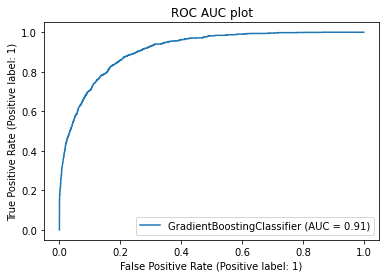

In [52]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

So, we are getting our model accuracy 86% and almost same cross-val-score which shows that 
our model is performing "well enough".

# Saving the Model:-

In [53]:
import pickle
filename='Census_Income_Pred.pkl'
pickle.dump(gb,open(filename,'wb'))

# Conclusion:-

In [54]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gb.predict(x_test))
Census_Income=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
Census_Income

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
6313,0,1
6314,0,0
6315,0,0
6316,1,0


> In this project, we build various models like logistic regression, naive bayes classifier, knn classifier,decision tree classifier, random forest classifier, adaboost classifier and gradientboosting classifier.


> A hyperparameter tuned gradient boosting classifier gives the highest accuracy score of 86% with almost same cross-validation score.